<a href="https://colab.research.google.com/github/LuizZaghetto/ProjetosIA/blob/main/ProjetoColorirGrafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(plt.cm.cmaps_listed.keys())

dict_keys(['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo'])


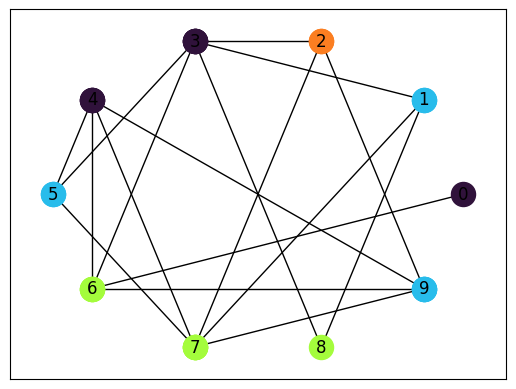

In [ ]:
def ordenaClique(e):   # Função para ordenar os cliques por tamanho
    return len(e)

def atribuir_cor(no, nos_coloridos, cores):   # Função para assimilar uma cor ao nó
    if no in nos_coloridos:
        return nos_coloridos[no]  # Retorna a cor atual do nó se ele já estiver colorido

    cores_adjacentes = set()    # Cria um conjunto de cores dos nós adjacentes
    for neighbor in G.neighbors(no):
        if neighbor in nos_coloridos:
           cores_adjacentes.add(nos_coloridos[neighbor])

    for cor in cores:  # Itera sobre as cores disponíveis e atribui uma cor ao nó
        if cor not in cores_adjacentes:
            nos_coloridos[no] = cor  # Adiciona o nó com sua cor correspondente ao dicionário
            return cor
    return None

G = nx.gnp_random_graph(10, 0.35)  # Faz todo o processo da criação do grafo
layout = nx.circular_layout(G)      # e define a quantidade de cores/ quais serão
qtdCores = 4
cores = [plt.cm.turbo(i/qtdCores) for i in range(qtdCores)]

nos_coloridos = {}  # Criação do dicionário para armazenar cor para nó
cliquinhos = list(nx.find_cliques(G)) # Busca dos cliquinhos e criação da lista
cliquinhos.sort(key=ordenaClique, reverse=True)

for clique in cliquinhos:
    for no in clique:
        cor = atribuir_cor(no, nos_coloridos, cores)  # Tenta atribuir uma cor ao nó
        if cor is not None:  # Se uma cor foi atribuída com sucesso
            nx.draw_networkx_nodes(G, nodelist=[no], pos=layout, node_color=cor)  # Desenha o nó com a cor atribuída
        else:  # Se não foi possível atribuir uma cor ao nó
            print("Não é possível colorir o nó ", no, " com as cores disponíveis.")
            for neighbor in G.neighbors(no):  # Percorre os vizinhos do nó
                cor_vizinho = atribuir_cor(neighbor, nos_coloridos, cores)  # Tenta recolorir o vizinho
                if cor_vizinho:  # Se uma cor foi atribuída ao vizinho
                    nos_coloridos[no] = cor_vizinho  # Atribui a mesma cor ao nó atual
                    cor = cor_vizinho  # Atualiza a cor do nó atual
                    nx.draw_networkx_nodes(G, nodelist=[no], pos=layout, node_color=cor)  # Desenha o nó com a cor atribuída
                    break  # Sai do loop de vizinhos
            else:  # Se nenhum vizinho pôde ser recolorido
                print("Não foi possível recolorir nenhum vizinho do nó ", no)
                break  # Sai do loop de cliques


nx.draw_networkx_labels(G, pos=layout, font_color="black") # Finaliza o grafo adicionando números e arestas
nx.draw_networkx_edges(G, pos=layout)
plt.show()


In [ ]:
cliquinhos


[[9, 3, 6, 7],
 [3, 2, 6, 7],
 [4, 0, 6, 7],
 [4, 5, 2, 7],
 [4, 6, 2, 7],
 [4, 0, 8],
 [4, 5, 8],
 [4, 5, 1],
 [9, 1],
 [3, 8]]